In [1]:
"""
Name: con_tracing.ipynb
Authors: Stephan Meighen-Berger, Andrea Turcati
Example for the tracing of the infection spread
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [3]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

In [4]:
# Module imports
from contagion import Contagion, config

In [10]:
# Options
config["infected"] = 1
config["simulation length"] = 20
config["average social circle"] = 10
config['variance social circle'] = 2
config['mean social circle interactions'] = 0.2
config['variance social circle interactions'] = 0.2
config['infection probability mean'] = 0.05
config['infection probability variance'] = 0.01
config["population size"] = 1000
config['trace spread'] = True
config["random state"] = np.random.RandomState(1337)

In [11]:
# Creating a contagion object
contagion = Contagion()

In [12]:
 # Storing the solutions
contagion.sim()
stats = pd.DataFrame(contagion.statistics)

In [13]:
# Constructing the infection graph
t_s = contagion.trace_infection  # The spread array
gr_inf = nx.Graph()  # Graph object
nodes_inf = np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
edges_inf = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
# Adding edges and nodes
gr_inf.add_nodes_from(nodes_inf)
gr_inf.add_edges_from(edges_inf)
# Constructing the contact graph
t_s = contagion.trace_contacts  # The spread array
gr_con = nx.Graph()  # Graph object
nodes_con = np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
edges_con = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
# Adding edges and nodes
gr_con.add_nodes_from(nodes_con)
gr_con.add_edges_from(edges_con)
# Entire population
nodes_pop = range(config['population size'])
gr = nx.Graph()
gr.add_nodes_from(nodes_pop)

In [14]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.
node_size = 50

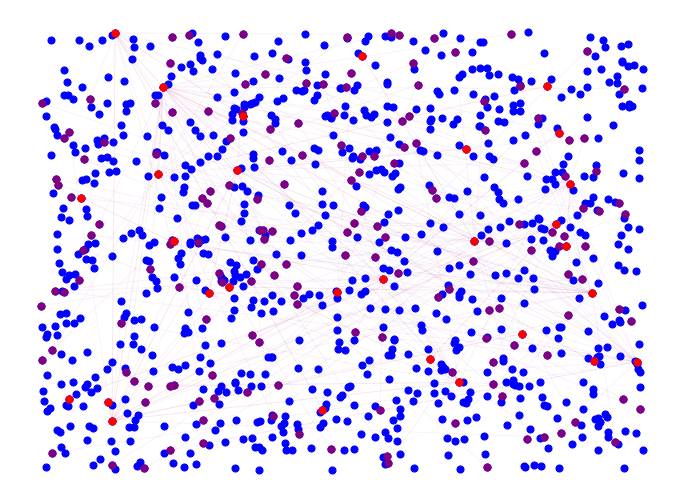

In [15]:
# colors = ['b' if gr.degree(n) < 2 else 'r' for n in nodes]
fig, ax = plt.subplots(figsize=(12,9))
pos = nx.random_layout(gr)  # nx.circular_layout(gr) # nx.spring_layout(gr)
# The population
nc_pop = nx.draw_networkx_nodes(gr, pos, nodelist=nodes_pop, node_color='b', 
                                with_labels=False, node_size=node_size)
# The contacted
nc_con = nx.draw_networkx_nodes(gr_con, pos, nodelist=nodes_con, node_color='purple', 
                                with_labels=False, node_size=node_size)
ec_con = nx.draw_networkx_edges(gr_con, pos, alpha=0.05, edge_color='purple')
# The infected
nc_inf = nx.draw_networkx_nodes(gr_inf, pos, nodelist=nodes_inf, node_color='r', 
                                with_labels=False, node_size=node_size)
ec_inf = nx.draw_networkx_edges(gr_inf, pos, alpha=0.05, edge_color='r')
ax.axis('off')
plt.show()

In [ ]:
fig.savefig(PICS+'Contagion_Tracing.png')

In [ ]:
# Animation stack
fontsize = 15.
# The frames are created in a loop
time_steps = 100
# Entire population
nodes_pop = range(config['population size'])
gr = nx.Graph()
gr.add_nodes_from(nodes_pop)
pos = nx.random_layout(gr)  # nx.circular_layout(gr) # nx.spring_layout(gr)
# Drawing first frame
fig, ax = plt.subplots(figsize=(12,9))
pos = nx.random_layout(gr)  # nx.circular_layout(gr) # nx.spring_layout(gr)
# The population
nc_pop = nx.draw_networkx_nodes(gr, pos, nodelist=nodes_pop, node_color='b', 
                                with_labels=False, node_size=node_size)
ax.axis('off')
fig.savefig(PICS + '\\Frames\\frame_%d.png' % (0))
plt.close(fig)
for i in range(time_steps):
    # Constructing the infection graph
    t_s = contagion.trace_infection[:i+3]  # The spread array
    gr_inf = nx.Graph()  # Graph object
    nodes_inf = np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
    edges_inf = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
    # Adding edges and nodes
    gr_inf.add_nodes_from(nodes_inf)
    gr_inf.add_edges_from(edges_inf)
    # Constructing the contact graph
    t_s = contagion.trace_contacts[:i+3]  # The spread array
    gr_con = nx.Graph()  # Graph object
    nodes_con = np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
    edges_con = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
    # Adding edges and nodes
    gr_con.add_nodes_from(nodes_con)
    gr_con.add_edges_from(edges_con)
    # Plotting
    fig, ax = plt.subplots(figsize=(12,9))
    # The population
    nc_pop = nx.draw_networkx_nodes(gr, pos, nodelist=nodes_pop, node_color='b', 
                                    with_labels=False, node_size=node_size)
    # The contacted
    nc_con = nx.draw_networkx_nodes(gr_con, pos, nodelist=nodes_con, node_color='purple', 
                                    with_labels=False, node_size=node_size)
    ec_con = nx.draw_networkx_edges(gr_con, pos, alpha=0.05, edge_color='purple')
    # The infected
    nc_inf = nx.draw_networkx_nodes(gr_inf, pos, nodelist=nodes_inf, node_color='r', 
                                    with_labels=False, node_size=node_size)
    ec_inf = nx.draw_networkx_edges(gr_inf, pos, alpha=0.05, edge_color='r')
    ax.axis('off')
    fig.savefig(PICS + '\\Frames\\frame_%d.png' % (i+1))
    plt.close(fig)
import imageio
images = []
filenames = np.array([
    PICS + 'Frames\\frame_%d.png' %i
    for i in range(time_steps)
])
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(PICS + 'Spread.gif',
                images, duration=0.2)